In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('DS1_C9_S7_Project_AbsenteeismAtWork_Data_cleaned.csv')
df

,Unnamed: 0,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,11.0,26.0,7,3,1,289.0,36,13.0,33.0,...,0,1,2,1.0,0,1.0,90,172.0,30.0,4
1,1,36.0,0.0,7,3,1,118.0,13,18.0,50.0,...,0,1,1,1.0,0,0.0,98,176.5,31.0,0
2,2,3.0,23.0,7,4,1,179.0,51,18.0,38.0,...,0,1,0,1.0,0,0.0,89,170.0,31.0,2
3,3,7.0,7.0,7,5,1,279.0,5,14.0,39.0,...,0,1,2,1.0,0,0.0,68,168.0,24.0,4
4,4,11.0,23.0,7,5,1,289.0,36,13.0,33.0,...,0,1,2,1.0,0,1.0,90,172.0,30.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,735,11.0,14.0,7,3,1,289.0,36,13.0,33.0,...,0,1,2,1.0,0,1.0,90,172.0,30.0,8
736,736,1.0,11.0,7,3,1,235.0,11,14.0,37.0,...,0,1,1,0.0,0,1.0,88,172.0,29.0,4
737,737,4.0,0.0,0,3,1,118.0,14,13.0,40.0,...,0,1,1,1.0,0,2.5,98,170.0,34.0,0
738,738,8.0,0.0,0,4,2,231.0,35,14.0,39.0,...,0,1,2,1.0,0,2.0,100,170.0,35.0,0


# TASK 1

In [7]:
# Create a binary target variable for high absenteeism
# Assuming "high absenteeism" as Absenteeism time > median (we'll use the median to classify "high" absenteeism)

# Calculate the median absenteeism time
median_absenteeism = df['Absenteeism time in hours' ].median()

# Create a binary column: 1 if absenteeism time > median, else 0
df['High Absenteeism'] = (df['Absenteeism time in hours'] > median_absenteeism).astype(int)

# Drop unnecessary columns
# Removing ID (identifier) and Absenteeism time in hours (since we now have 'High Absenteeism')
df_cleaned = df.drop(['ID', 'Absenteeism time in hours'], axis=1)

# Display the updated dataset with the new binary target variable
df_cleaned.head()


,Unnamed: 0,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,High Absenteeism
0,0,26.0,7,3,1,289.0,36,13.0,33.0,239.554,...,0,1,2,1.0,0,1.0,90,172.0,30.0,1
1,1,0.0,7,3,1,118.0,13,18.0,50.0,239.554,...,0,1,1,1.0,0,0.0,98,176.5,31.0,0
2,2,23.0,7,4,1,179.0,51,18.0,38.0,239.554,...,0,1,0,1.0,0,0.0,89,170.0,31.0,0
3,3,7.0,7,5,1,279.0,5,14.0,39.0,239.554,...,0,1,2,1.0,0,0.0,68,168.0,24.0,1
4,4,23.0,7,5,1,289.0,36,13.0,33.0,239.554,...,0,1,2,1.0,0,1.0,90,172.0,30.0,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Separate features and target variable
X = df_cleaned.drop('High Absenteeism', axis=1)
y = df_cleaned['High Absenteeism']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Train Logistic Regression model
logreg.fit(X_train_scaled, y_train)

# Train KNN model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate both models
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

logreg_report = classification_report(y_test, y_pred_logreg)
knn_report = classification_report(y_test, y_pred_knn)

logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
knn_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])

logreg_accuracy, knn_accuracy, logreg_report, knn_report, logreg_roc_auc, knn_roc_auc
for model, metrics in results.items():
    print(f"{model}:\n")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n" + "="*50 + "\n")



Logistic Regression:

Accuracy: 0.6622
ROC AUC: 0.7550
Classification Report:
{'0': {'precision': 0.6704545454545454, 'recall': 0.7375, 'f1-score': 0.7023809523809523, 'support': 80.0}, '1': {'precision': 0.65, 'recall': 0.5735294117647058, 'f1-score': 0.609375, 'support': 68.0}, 'accuracy': 0.6621621621621622, 'macro avg': {'precision': 0.6602272727272727, 'recall': 0.6555147058823529, 'f1-score': 0.6558779761904762, 'support': 148.0}, 'weighted avg': {'precision': 0.6610565110565111, 'recall': 0.6621621621621622, 'f1-score': 0.6596484877734877, 'support': 148.0}}


KNN:

Accuracy: 0.6689
ROC AUC: 0.7180
Classification Report:
{'0': {'precision': 0.7012987012987013, 'recall': 0.675, 'f1-score': 0.6878980891719745, 'support': 80.0}, '1': {'precision': 0.6338028169014085, 'recall': 0.6617647058823529, 'f1-score': 0.6474820143884893, 'support': 68.0}, 'accuracy': 0.668918918918919, 'macro avg': {'precision': 0.6675507591000549, 'recall': 0.6683823529411765, 'f1-score': 0.6676900517802319

Accuracy: Both models achieved similar accuracy scores:

Logistic Regression: 0.6622

KNN: 0.6689

Classification Report: The classification reports provide a detailed breakdown of the models' performance on each class (high absenteeism vs. low absenteeism). Both reports indicate:

Precision: The models are slightly better at identifying employees without high absenteeism (class 0) than those with high absenteeism (class 1).

Recall: Both models struggle slightly more with recalling employees who actually have high absenteeism (class 1).

F1-Score: This metric combines precision and recall, and both models have similar F1 scores for each class.

ROC-AUC Score:
Logistic Regression: 0.7549
KNN: 0.7180

A higher ROC-AUC score indicates better performance in differentiating between the two classes. Here, Logistic Regression has a slight edge over KNN.

# TASK 2

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

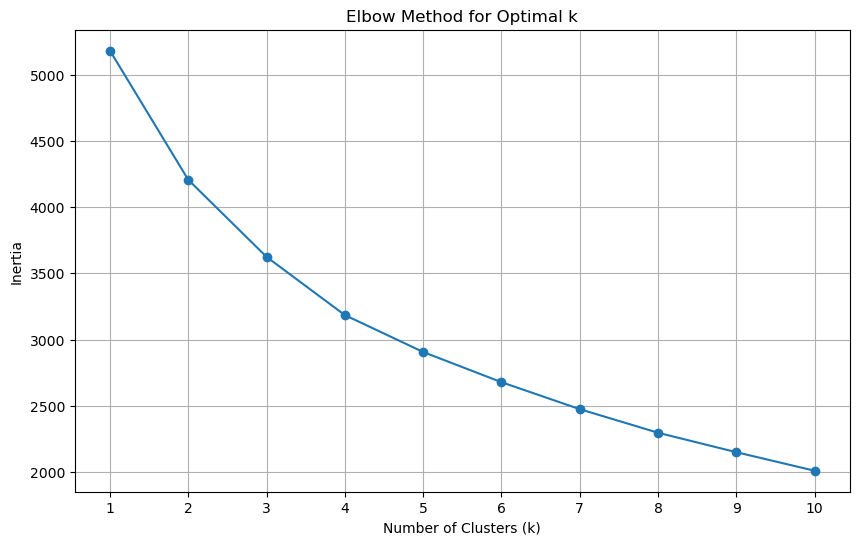

In [9]:
#tas2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

#  relevant features for clustering
# We'll use: 'Reason for absence', 'Month of absence', 'Absenteeism time in hours', 'Service time', 'Transportation expense'
features_for_clustering = df[['Reason for absence', 'Service time', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'High Absenteeism']]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Use the Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)  # Testing for 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()


In [10]:
# Assuming the optimal number of clusters is determined (let's say it's 4 for this example)
optimal_k = 4

# Fit the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Analyze the clusters
cluster_analysis = df.groupby('Cluster').mean()  # Mean of features in each cluster
print(cluster_analysis)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         Unnamed: 0         ID  Reason for absence  Month of absence  \
Cluster                                                                
0        333.806122  16.505102           16.653061          6.877551   
1        387.244444   6.481481           23.333333          5.829630   
2        368.208556  24.048128           22.957219          6.053476   
3        391.310811  21.288288           15.824324          6.364865   

         Day of the week   Seasons  Transportation expense  \
Cluster                                                      
0               3.903061  2.545918              285.096939   
1               4.007407  2.385185              192.340741   
2               3.994652  2.652406              204.673797   
3               3.801802  2.549550              196.601351   

         Distance from Residence to Work  Service time        Age  ...  \
Cluster                                                            ...   
0                              35.770408      

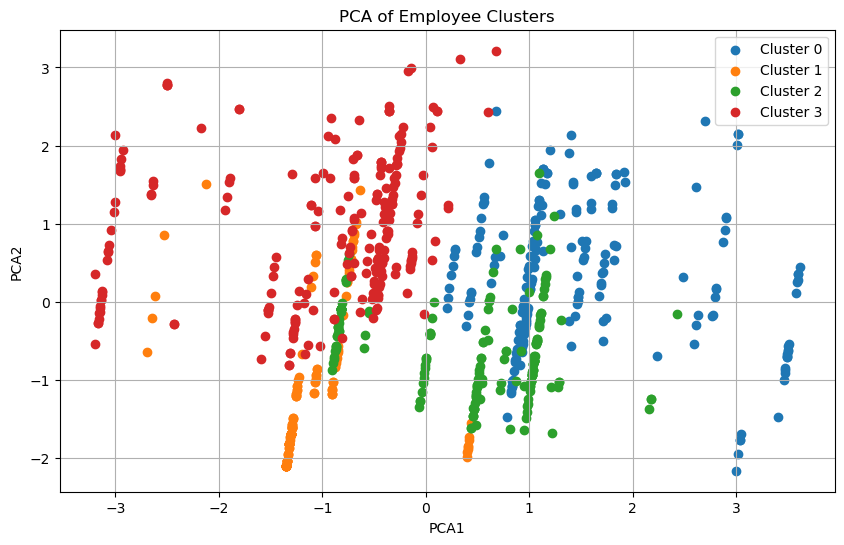

In [11]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

# Plotting the PCA components colored by cluster
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(pca_df[pca_df['Cluster'] == cluster]['PCA1'],
                pca_df[pca_df['Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')
plt.title('PCA of Employee Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()
plt.show()


In [16]:
df.columns

Index(['Unnamed: 0', 'ID', 'Reason for absence', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours',
       'High Absenteeism', 'Cluster'],
      dtype='object')